# <font color='Blue'>CS109 Project : Educational Oversight</font>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## <font color='Blue'>Parse Data</font>

In [2]:
df_overall = pd.read_csv("merged.csv")
print df_overall.shape
df_overall.head()

(1428, 66)


state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  no_of_sat_test_takers  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  \
0    ALABAMA  2013            14133.06                    NaN                15.82              47161.77                        62069                         56144                         51527                         48965               864               1128               1048                862                  3902                   3172                    547                  119               538             122           532         118                     NaN   
1    ALABAMA  2012            21449.70                    NaN                14.35              51877.22                        61642                         56229                         50387                         48945               865                900                829                698                  3292                   3558                    544                  117               534             121           530         118                     280   
2    ALABAMA  2011            20759.19                    NaN                15.60              47722.67                        61412                         55908                         50785                         49510              1256               1335               1221                842                  4654                   3879                    528                  121               531             121           527         116                     256   
3    ALABAMA  2010            21306.38                    NaN                15.31              49363.24                        62615                         57644                         51962                         49719              1216               1409               1256               1097                  4978                   3664                    546                  119               541             121           536         115                     238   
4    ALABAMA  2009            20417.00                 761982                15.77              47492.00                        63338                         57794                         50199                         48164              1263               1461               1358               1267                  5349                   3365                    556                  112               550             116           544         108                     310   

   high_school_or_equivalent  some_college_less_than_4_yr_degree  bachelors_degree_or_higher  american_indian_alaska_native_male_grade_9  american_indian_alaska_native_female_grade_9  asian_or_asian_pacific_islander_male_grade_9  asian_or_asian_pacific_islander_female_grade_9  hispanic_male_grade_9  hispanic_female_grade_9  black_male_grade_9  black_female_grade_9  white_male_grade_9  white_female_grade_9  american_indian_alaska_native_male_grade_10  \
0                        NaN                                 NaN                         NaN                                         NaN                                           NaN                                           NaN                                             NaN                    NaN                      NaN                 NaN                   NaN                 NaN                   NaN                                          NaN   
1                        605                                 554                         522                                         280                                           295                                           401         

In [3]:
df_2004_onwards = df_overall[df_overall['year'] >= 2004]
print df_2004_onwards.shape
df_2004_onwards.head()

(510, 66)


state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  no_of_sat_test_takers  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  \
0    ALABAMA  2013            14133.06                    NaN                15.82              47161.77                        62069                         56144                         51527                         48965               864               1128               1048                862                  3902                   3172                    547                  119               538             122           532         118                     NaN   
1    ALABAMA  2012            21449.70                    NaN                14.35              51877.22                        61642                         56229                         50387                         48945               865                900                829                698                  3292                   3558                    544                  117               534             121           530         118                     280   
2    ALABAMA  2011            20759.19                    NaN                15.60              47722.67                        61412                         55908                         50785                         49510              1256               1335               1221                842                  4654                   3879                    528                  121               531             121           527         116                     256   
3    ALABAMA  2010            21306.38                    NaN                15.31              49363.24                        62615                         57644                         51962                         49719              1216               1409               1256               1097                  4978                   3664                    546                  119               541             121           536         115                     238   
4    ALABAMA  2009            20417.00                 761982                15.77              47492.00                        63338                         57794                         50199                         48164              1263               1461               1358               1267                  5349                   3365                    556                  112               550             116           544         108                     310   

   high_school_or_equivalent  some_college_less_than_4_yr_degree  bachelors_degree_or_higher  american_indian_alaska_native_male_grade_9  american_indian_alaska_native_female_grade_9  asian_or_asian_pacific_islander_male_grade_9  asian_or_asian_pacific_islander_female_grade_9  hispanic_male_grade_9  hispanic_female_grade_9  black_male_grade_9  black_female_grade_9  white_male_grade_9  white_female_grade_9  american_indian_alaska_native_male_grade_10  \
0                        NaN                                 NaN                         NaN                                         NaN                                           NaN                                           NaN                                             NaN                    NaN                      NaN                 NaN                   NaN                 NaN                   NaN                                          NaN   
1                        605                                 554                         522                                         280                                           295                                           401         

In [4]:
# List unique values in the df['state_name'] column
list_states = pd.unique(df_overall['state_name'].ravel())
print len(list_states)
print list_states

51
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [5]:
# Subset df_overall by state
df = {}
for state in list_states:
    df[state] = pd.DataFrame(df_overall[df_overall['state_name'] == state])

## <font color='Blue'>Exploratory Data Analysis (EDA)</font>

### 1. Number of secondary teachers (1986 to 2013), Students' enrolment (1986 to 2013) and SAT test-takers (2005 to 2013)

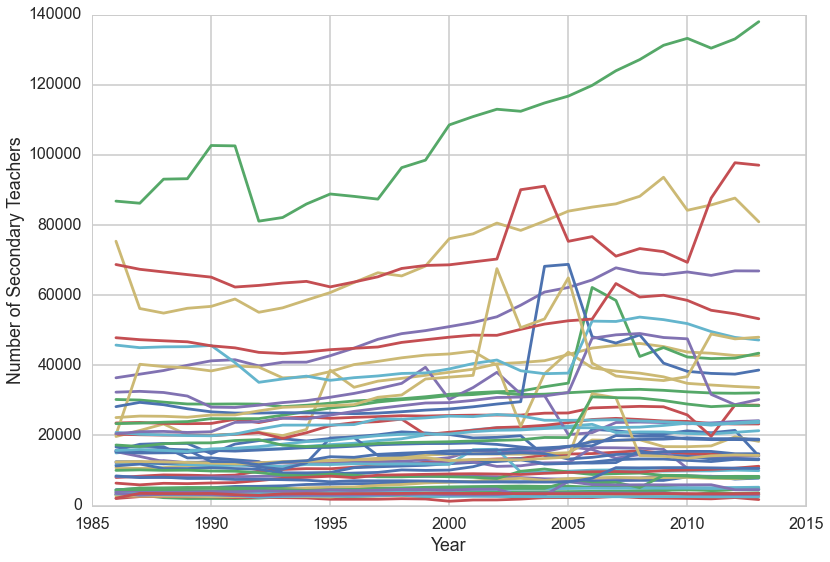

In [6]:
index_year = df['ALABAMA']['year']

for state in list_states:
    number_secondary_teachers = df[state]['secondary_teachers']
    plt.plot(index_year, number_secondary_teachers, label=state)
    
plt.xlabel("Year")
plt.ylabel("Number of Secondary Teachers")

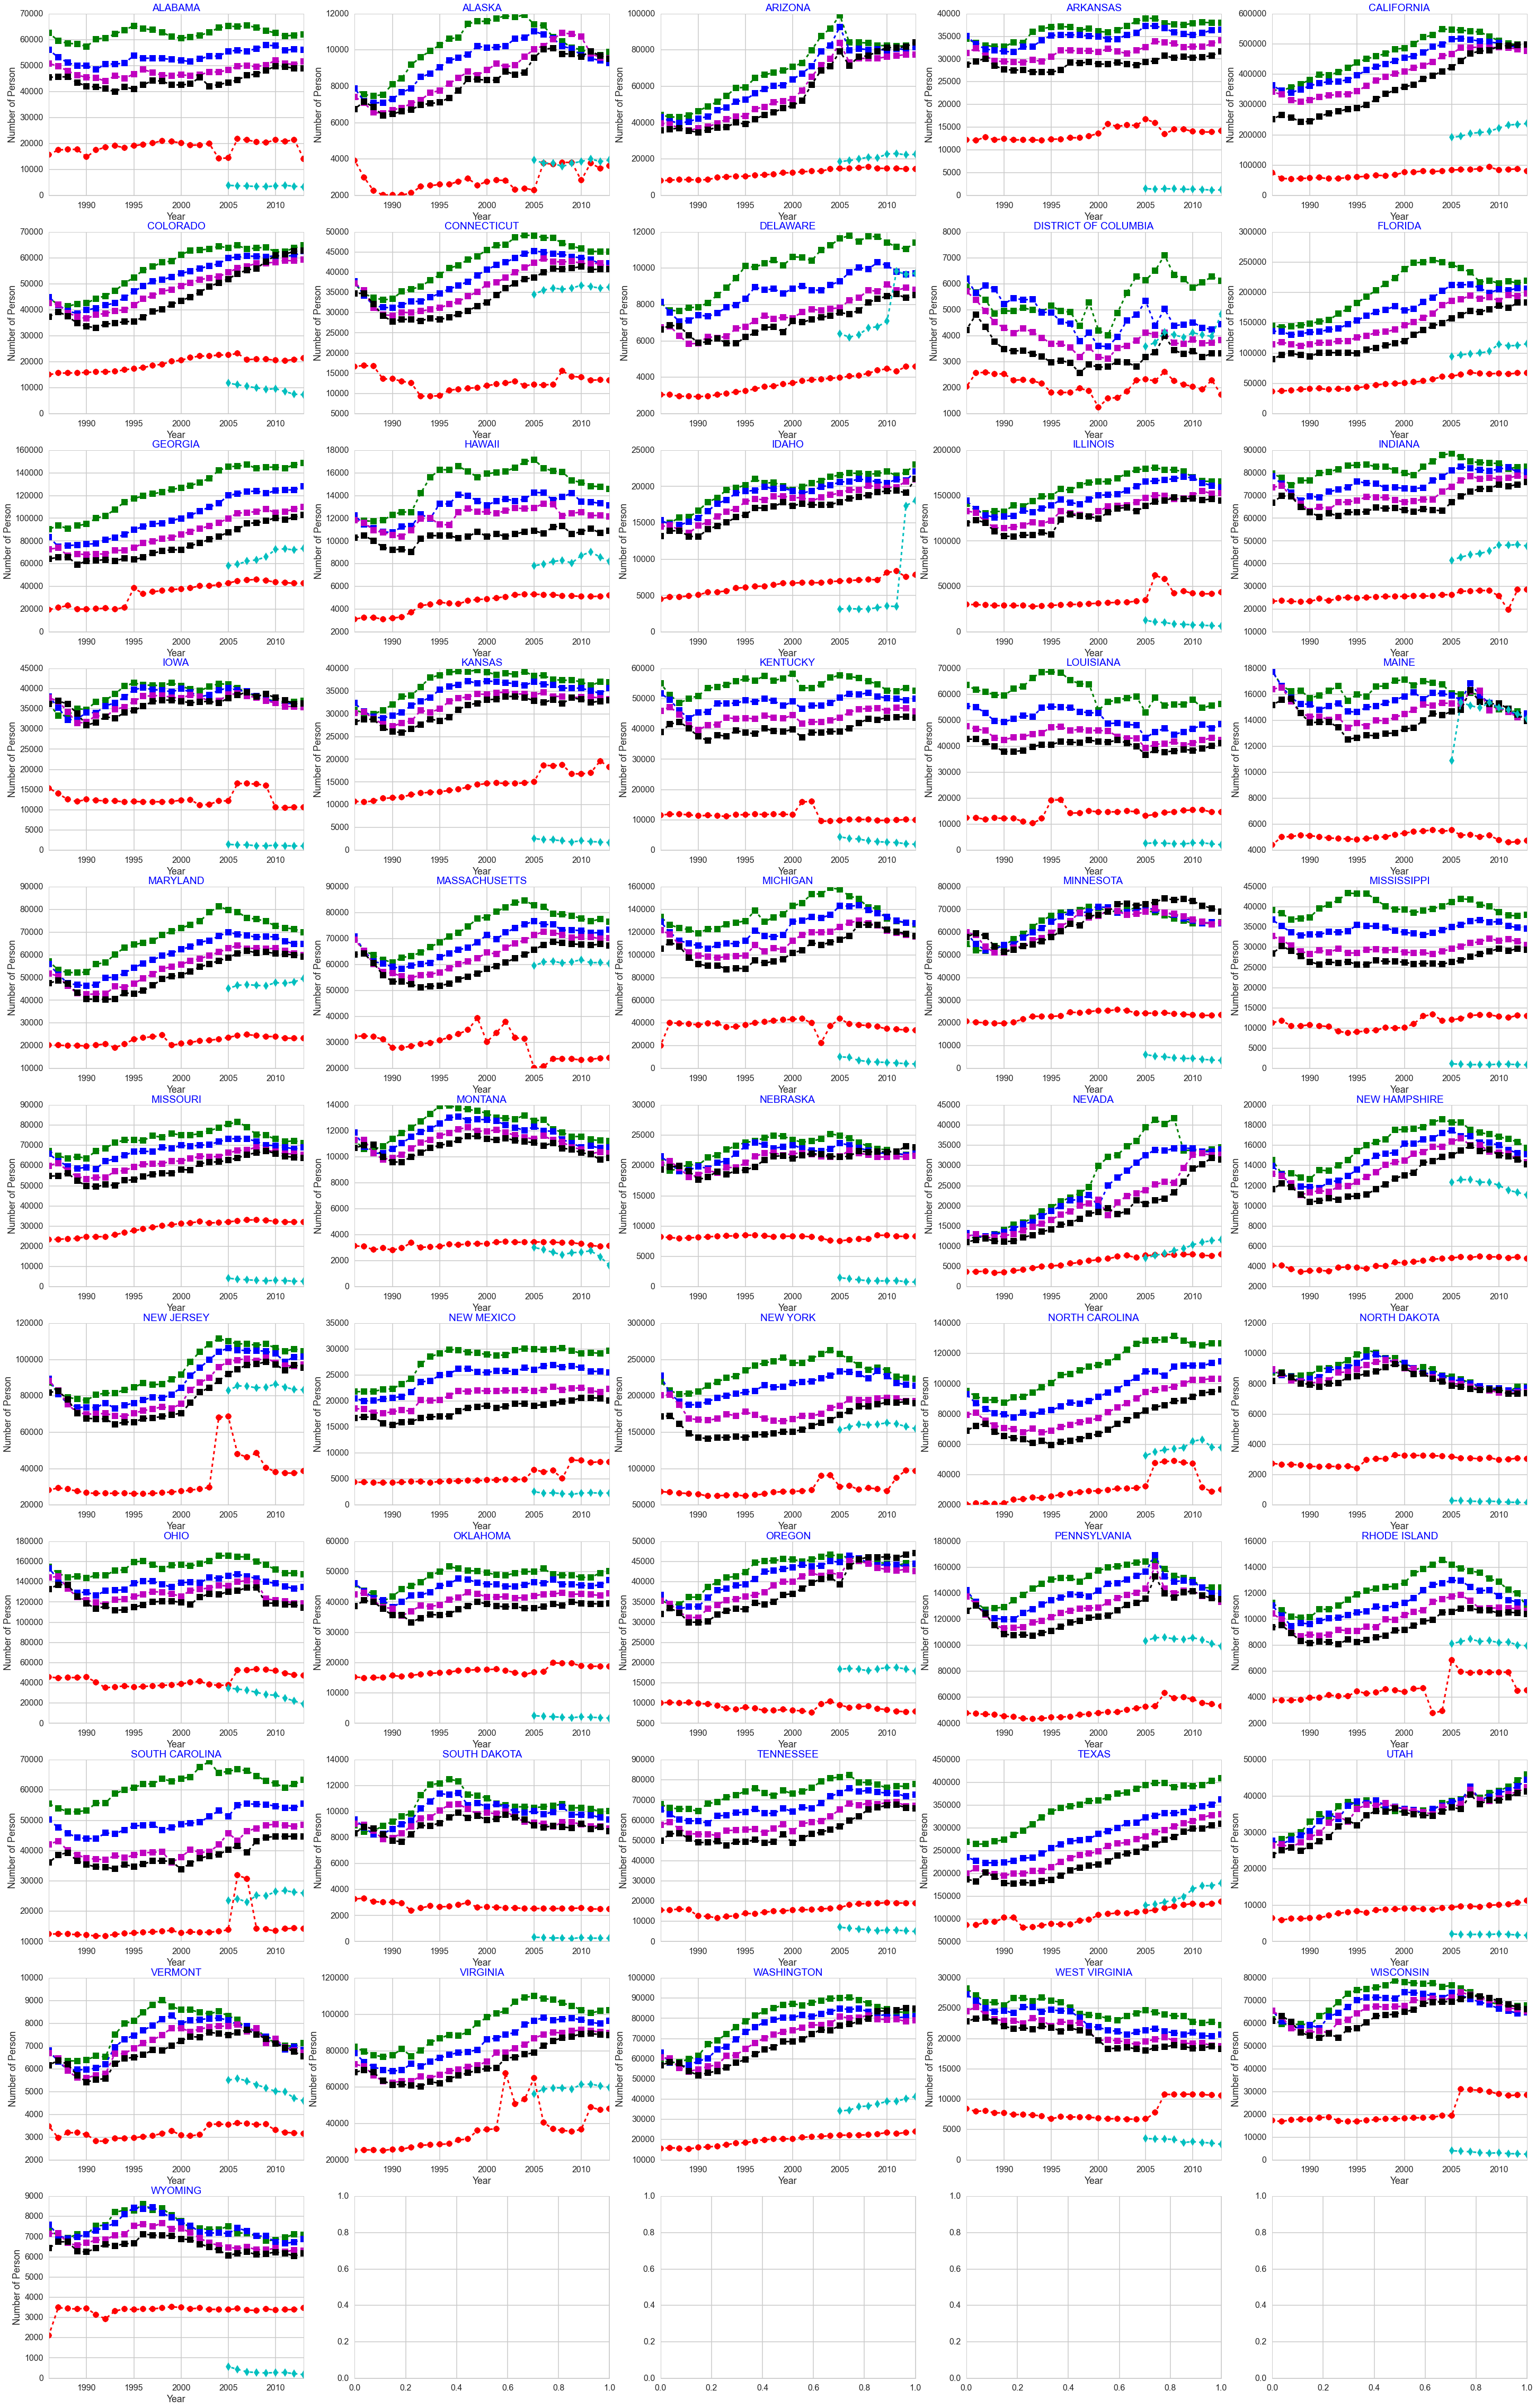

In [7]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df[state]['year']
    teachers = df[state]['secondary_teachers']
    grade9 = df[state]['grade_9_students_enrollment']
    grade10 = df[state]['grade_10_students_enrollment']
    grade11 = df[state]['grade_11_students_enrollment']
    grade12 = df[state]['grade_12_students_enrollment']
    no_of_sat_test_takers = df[state]['no_of_sat_test_takers']
    
    ax.plot(index, teachers, 'o--', color='r', lw=3, label="Teachers")
    ax.plot(index, grade9, 's--', color='g', lw=3, label="Grade 9")
    ax.plot(index, grade10, 's--', color='b', lw=3, label="Grade 10")
    ax.plot(index, grade11, 's--', color='m', lw=3, label="Grade 11")
    ax.plot(index, grade12, 's--', color='k', lw=3, label="Grade 12")
    ax.plot(index, no_of_sat_test_takers, 'd--', color='c', lw=3, label="SAT Test Takers")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((1986, 2013))
#     ax.set_ylim((0, 600000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")

### 2. Students' dropouts (2004 to 2013)

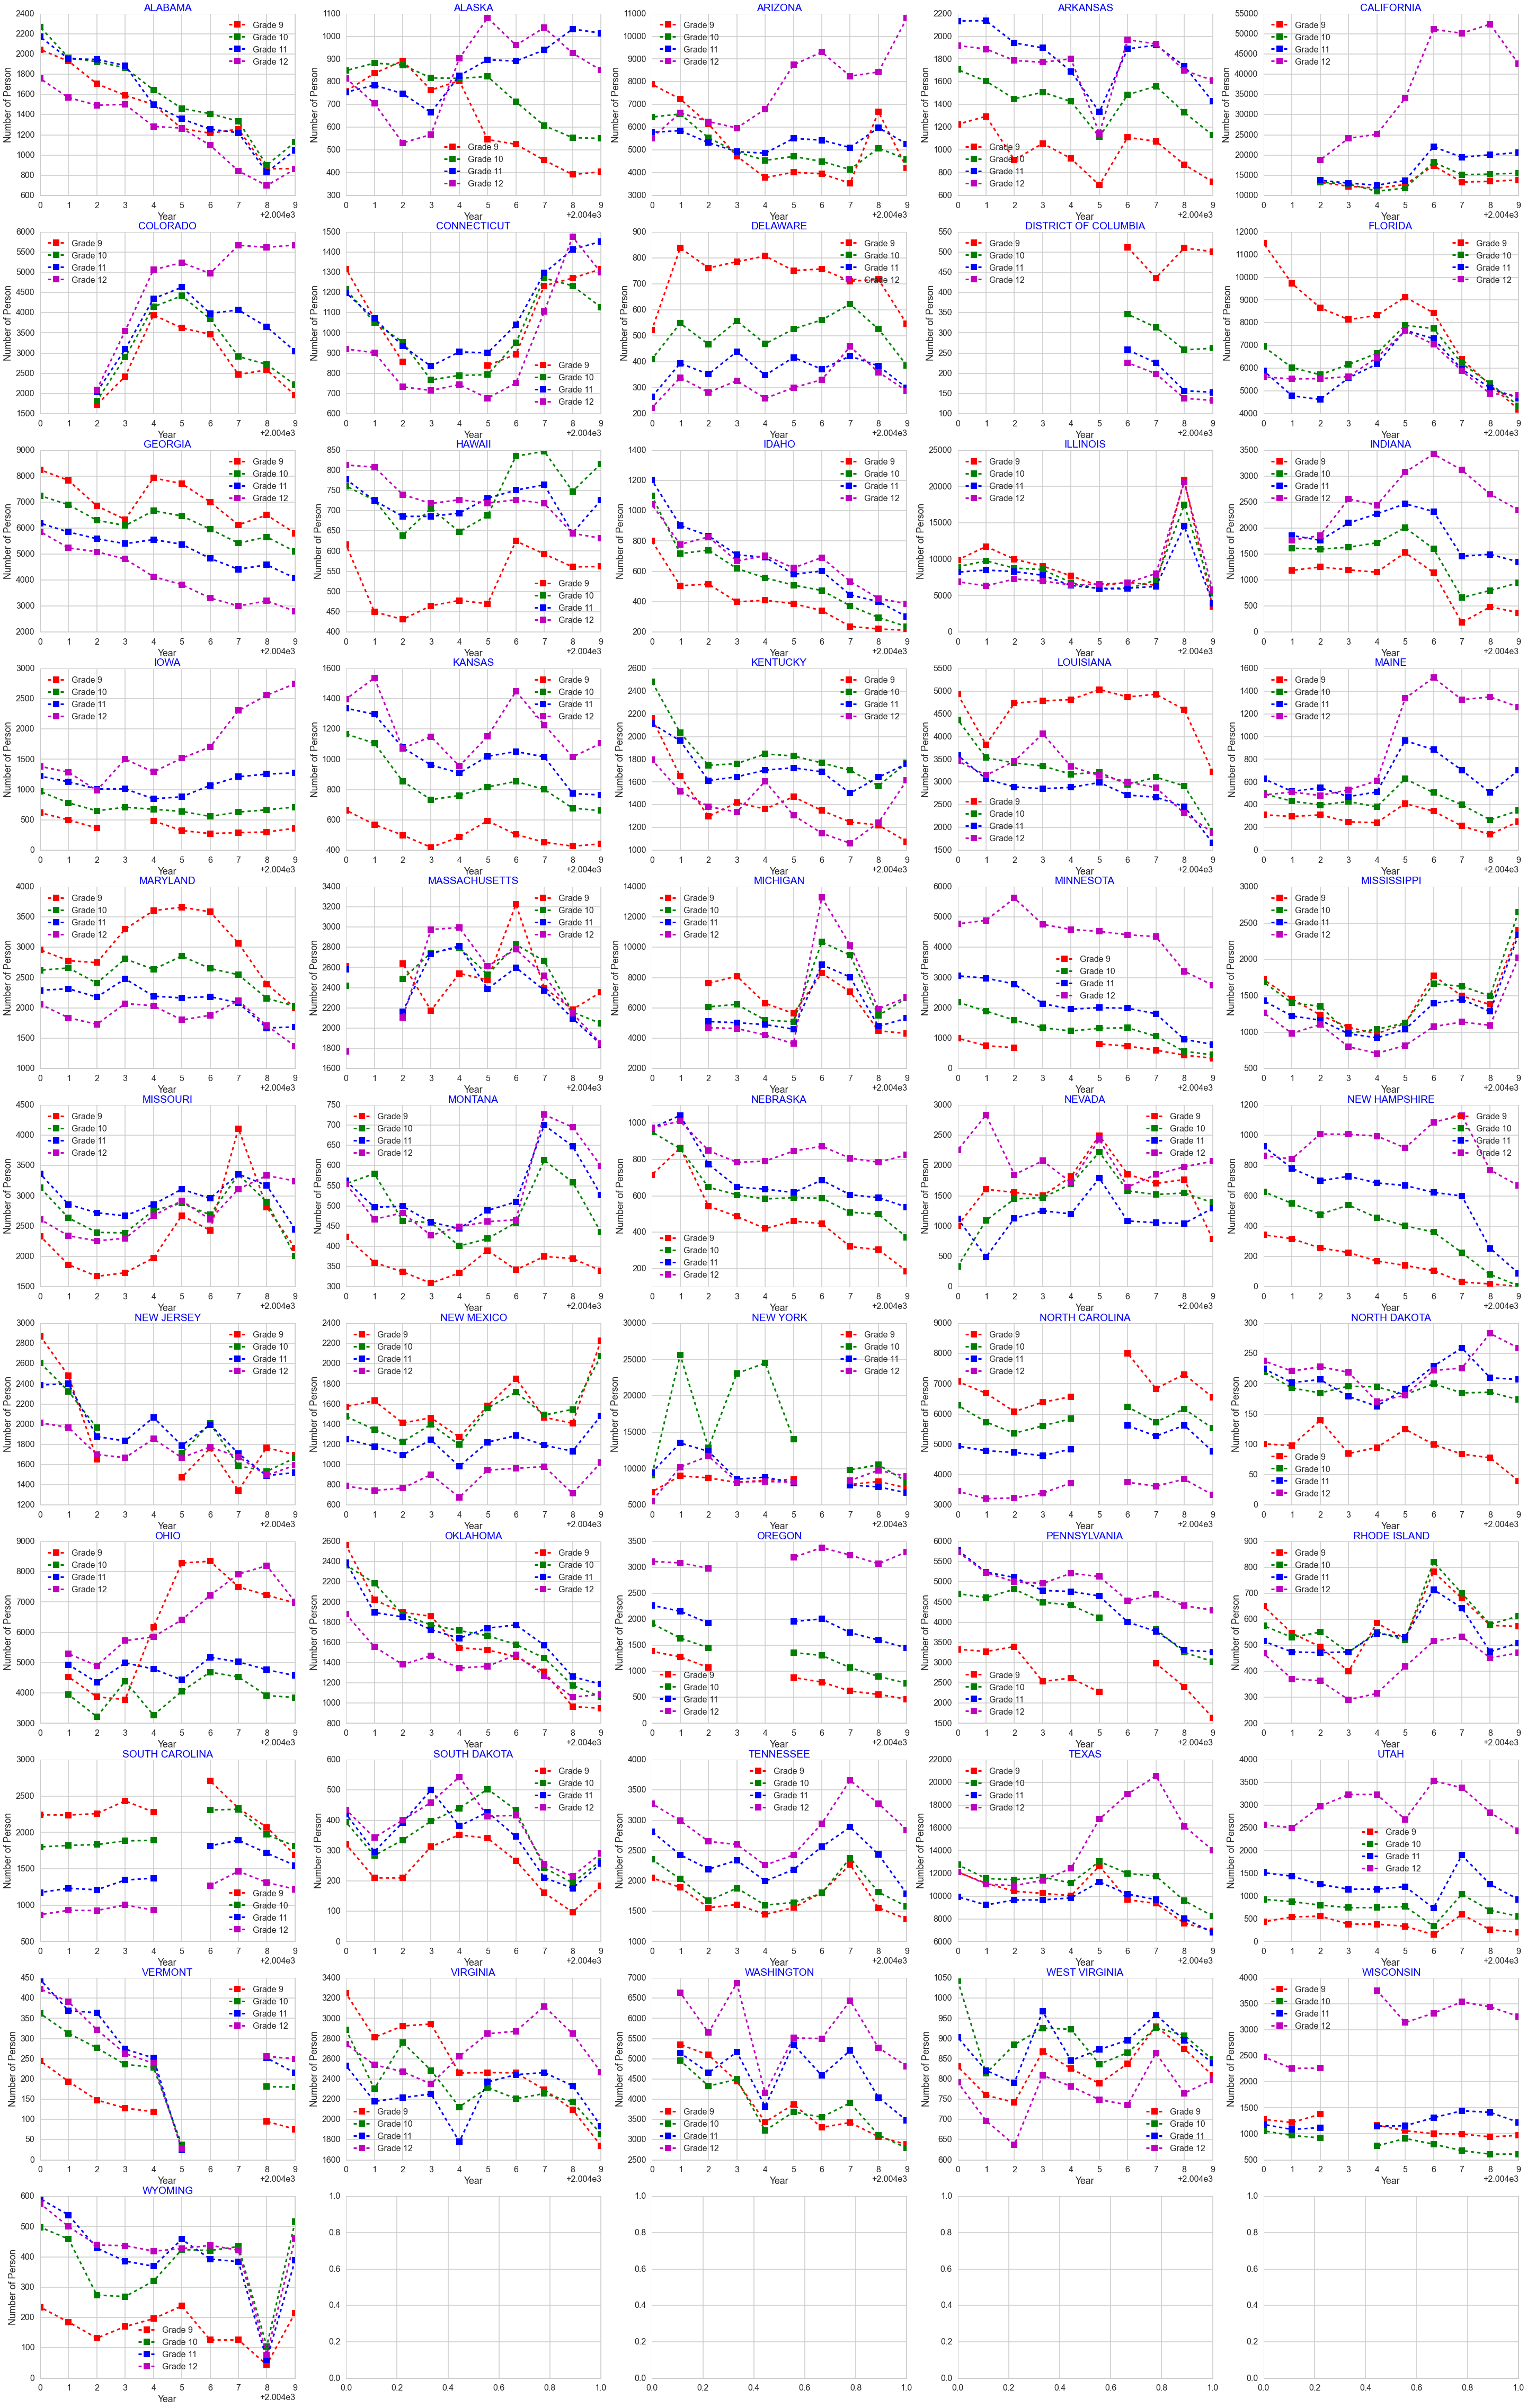

In [8]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df[state]['year']
    grade9 = df[state]['grade_9_dropouts']
    grade10 = df[state]['grade_10_dropouts']
    grade11 = df[state]['grade_11_dropouts']
    grade12 = df[state]['grade_12_dropouts']

    ax.plot(index, grade9, 's--', color='r', lw=3, label="Grade 9")
    ax.plot(index, grade10, 's--', color='g', lw=3, label="Grade 10")
    ax.plot(index, grade11, 's--', color='b', lw=3, label="Grade 11")
    ax.plot(index, grade12, 's--', color='m', lw=3, label="Grade 12")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2004, 2013))
#     ax.set_ylim((0, 2000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")
    ax.legend(loc='best')

#### <font color='red'>Note: "Year" label for x-limit not showing (suspect due to NaN in the dropouts data)</font>

### 3. SAT section scores (2005 to 2013)

/Users/cjl6/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


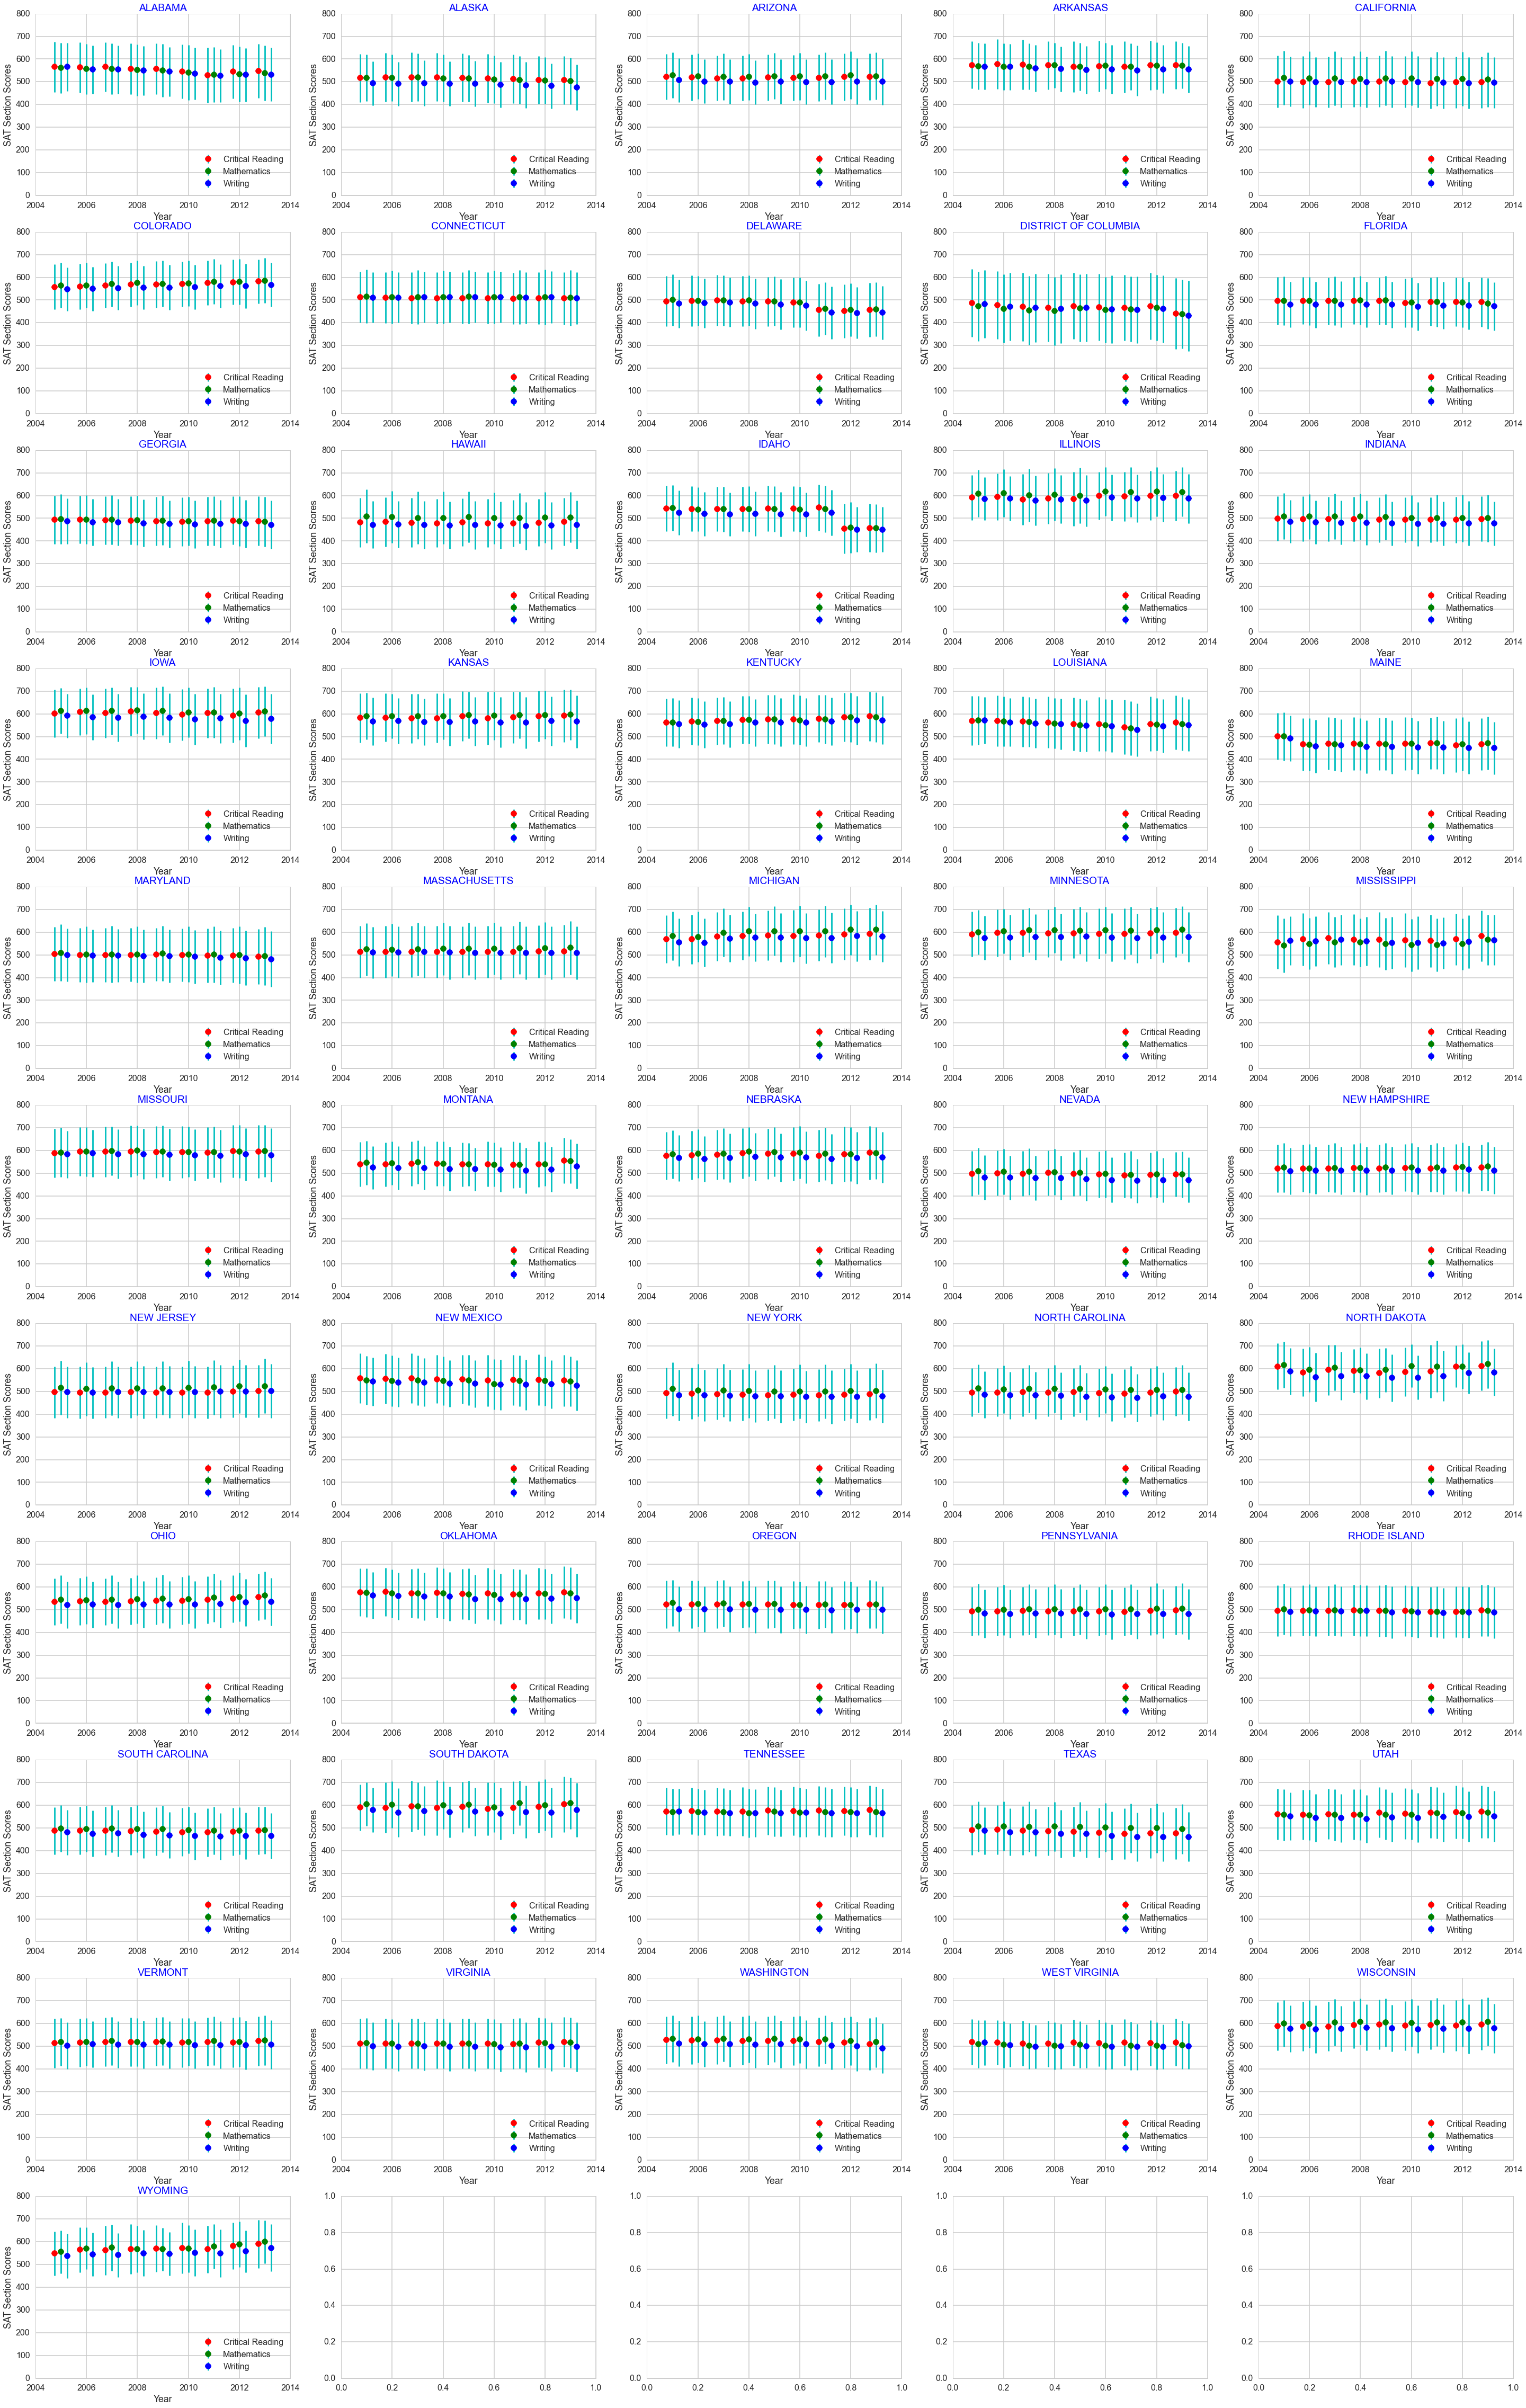

In [9]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df[state]['year']
    
    critical_reading_mean = df[state]['critical_reading_mean']
    critical_reading_sd = df[state]['critical_reading_sd']
    mathematics_mean = df[state]['mathematics_mean']
    mathematics_sd = df[state]['mathematics_sd']
    writing_mean = df[state]['writing_mean']
    writing_sd = df[state]['writing_sd']
    
    ax.errorbar(index - 0.25, critical_reading_mean, critical_reading_sd, fmt='o', ecolor='c', color='r', label="Critical Reading")
    ax.errorbar(index, mathematics_mean, mathematics_sd, fmt='o', ecolor='c', color='g', label="Mathematics")
    ax.errorbar(index + 0.25, writing_mean, writing_sd, fmt='o', ecolor='c', color='b', label="Writing")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2004, 2014))
    ax.set_ylim((0, 800))
    ax.set_xlabel("Year")
    ax.set_ylabel("SAT Section Scores")
    ax.legend(loc='lower right')

#### <font color='red'>Note: y-limit for the subplots above are not identical</font>

### 4. Current Population Survey (CPS) (2003 to 2013)

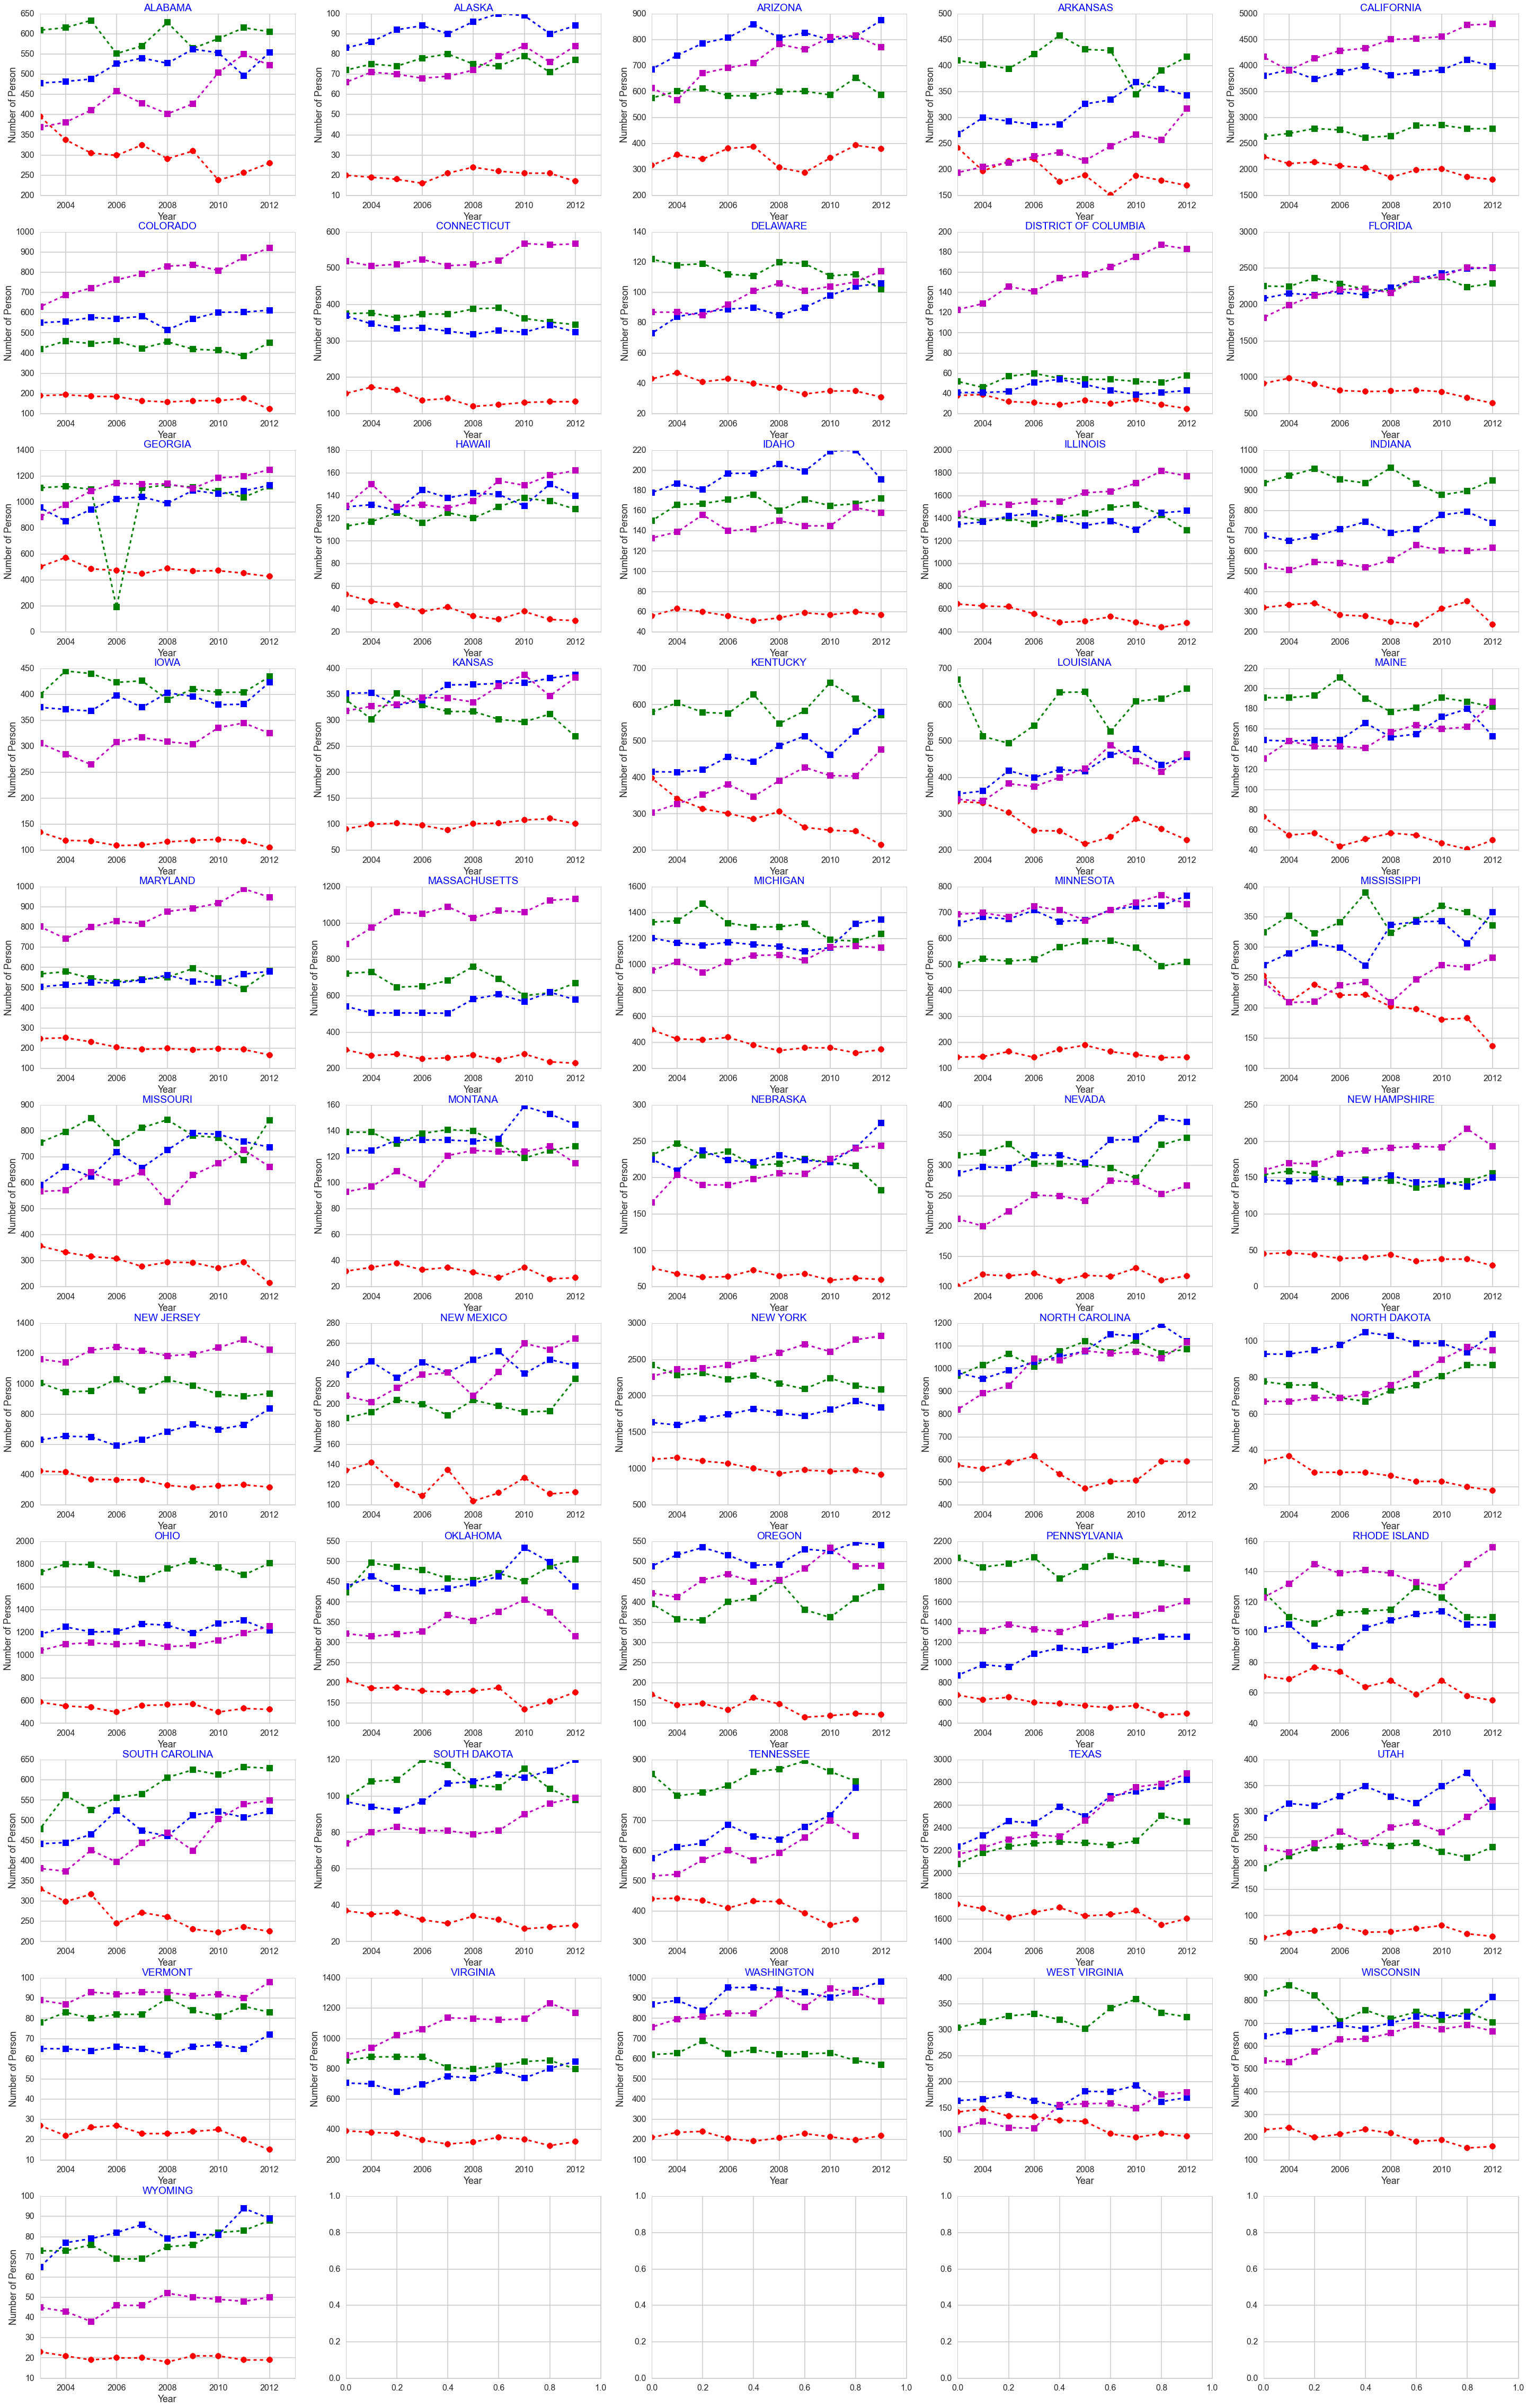

In [10]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df[state]['year']
    no_high_school_diploma = df[state]['no_high_school_diploma']
    high_school_or_equivalent = df[state]['high_school_or_equivalent']
    some_college_less_than_4_yr_degree = df[state]['some_college_less_than_4_yr_degree']
    bachelors_degree_or_higher = df[state]['bachelors_degree_or_higher']
    
    ax.plot(index, no_high_school_diploma, 'o--', color='r', lw=3, label="no_high_school_diploma")
    ax.plot(index, high_school_or_equivalent, 's--', color='g', lw=3, label="high_school_or_equivalent")
    ax.plot(index, some_college_less_than_4_yr_degree, 's--', color='b', lw=3, label="some_college_less_than_4_yr_degree")
    ax.plot(index, bachelors_degree_or_higher, 's--', color='m', lw=3, label="bachelors_degree_or_higher")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2003, 2013))
#     ax.set_ylim((0, 1000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")

#### <font color='red'>Note: x-limit for CPS and number of secondary teachers are not identical</font>
#### <font color='red'>Note: y-limit for the CPS subplots above are not identical</font>

### 5. PairPlot

AttributeError: max must be larger than min in range parameter.

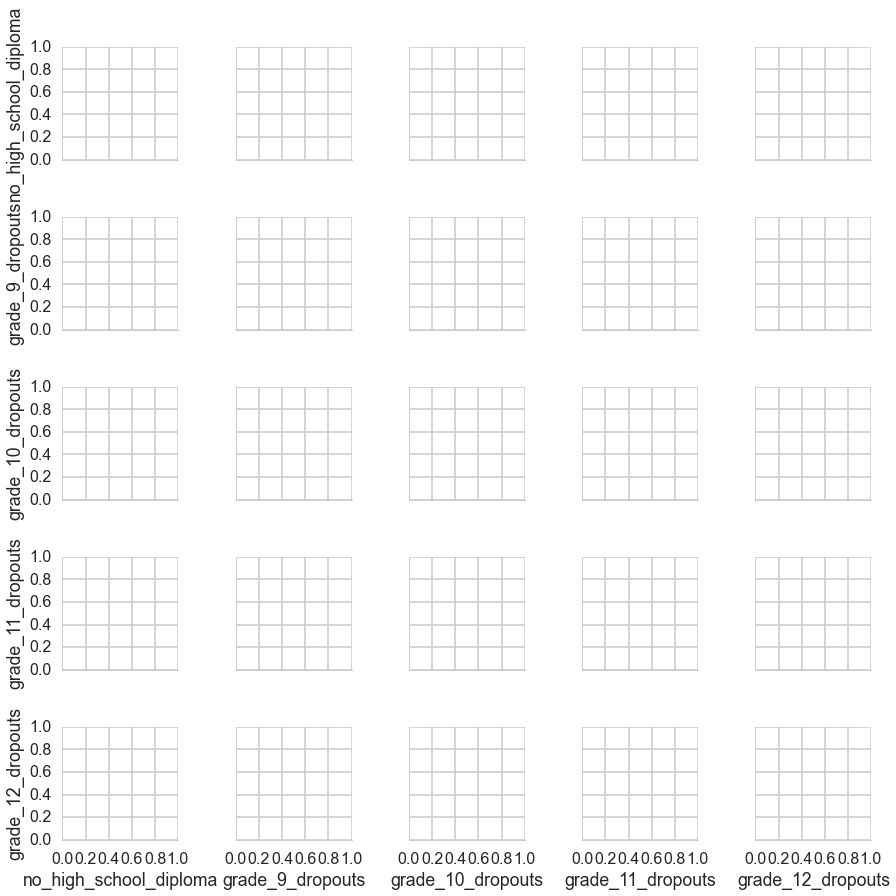

In [11]:
# Reference:
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html
g = sns.pairplot(df_2004_onwards, vars=["no_high_school_diploma", "grade_9_dropouts","grade_10_dropouts",'grade_11_dropouts','grade_12_dropouts'],
                 hue="state_name")